# Problem 5

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
"""
Step 1 : Generate Toy data
"""

d = 35
n_train, n_val, n_test = 300, 60, 30
np.random.seed(0)
beta = np.random.randn(d)
beta_true = beta / np.linalg.norm(beta)
# Generate and fix training data
X_train = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_train)])
Y_train = X_train @ beta_true + np.random.normal(loc = 0.0, scale = 0.5, size = n_train)
# Generate and fix validation data (for tuning lambda). 
X_val = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_val)])
Y_val = X_val @ beta_true 
# Generate and fix test data
X_test = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_test)])
Y_test = X_test @ beta_true 

In [3]:
"""
Step 2 : Solve the problem
"""

def solve_lsqr(X, y, lamda):
    # return  np.linalg.inv(np.dot(X.T, X) + lamda * np.identity(X.shape[1])) @ X.T @ y    
    # using backsolve is faster than computing explicit inverse
    return  np.linalg.solve(np.dot(X.T, X) + lamda * np.identity(X.shape[1]), X.T @ y)

def get_error(tilde_x, y, theta) : 
    """
    Calculate $RMSE$ for given test dataset (tilde_x, y) and infered theta vector. 
    """
    return np.linalg.norm(tilde_x @ theta - y) 


def ReLU(x): 
    """
    Custom ReLU function that is applied elementwisely.
    """
    return np.where(np.asarray(x) > 0, x, 0)

lambda_list = [2 ** i for i in range(-6, 6)]
num_params = np.arange(1,1501,10)

li = 10
prev_error_val = 10
grad = 1
errors_opt_lambda = []
errors_fixed_lambda = []
for p in num_params : 
    weight_matrix = np.random.normal(loc = 0.0, scale = 1 / np.sqrt(p), size = (p, d))
    x_val_tilde = ReLU(X_val @ weight_matrix.T)
    theta_val = solve_lsqr(x_val_tilde, Y_val, lambda_list[li])
    error_val = get_error(x_val_tilde, Y_val, theta_val)
    li = li + int((error_val - prev_error_val) * grad)
    if li < 0 : li = 0
    if li >= len(lambda_list) : li = len(lambda_list) - 1
    grad = 1 if error_val - prev_error_val > 0 else -1
    prev_error_val = error_val

    weight_matrix = np.random.normal(loc = 0.0, scale = 1 / np.sqrt(p), size = (p, d))
    x_tilde = ReLU(X_train @ weight_matrix.T)
    theta = solve_lsqr(x_tilde, Y_train, lambda_list[li])
    X_test_tilde = ReLU(X_test @ weight_matrix.T)
    error = get_error(X_test_tilde, Y_test, theta)
    errors_opt_lambda.append(error)

    weight_matrix = np.random.normal(loc = 0.0, scale = 1 / np.sqrt(p), size = (p, d))
    x_tilde = ReLU(X_train @ weight_matrix.T)
    theta = solve_lsqr(x_tilde, Y_train, 0.01)
    X_test_tilde = ReLU(X_test @ weight_matrix.T)
    error = get_error(X_test_tilde, Y_test, theta)
    errors_fixed_lambda.append(error)

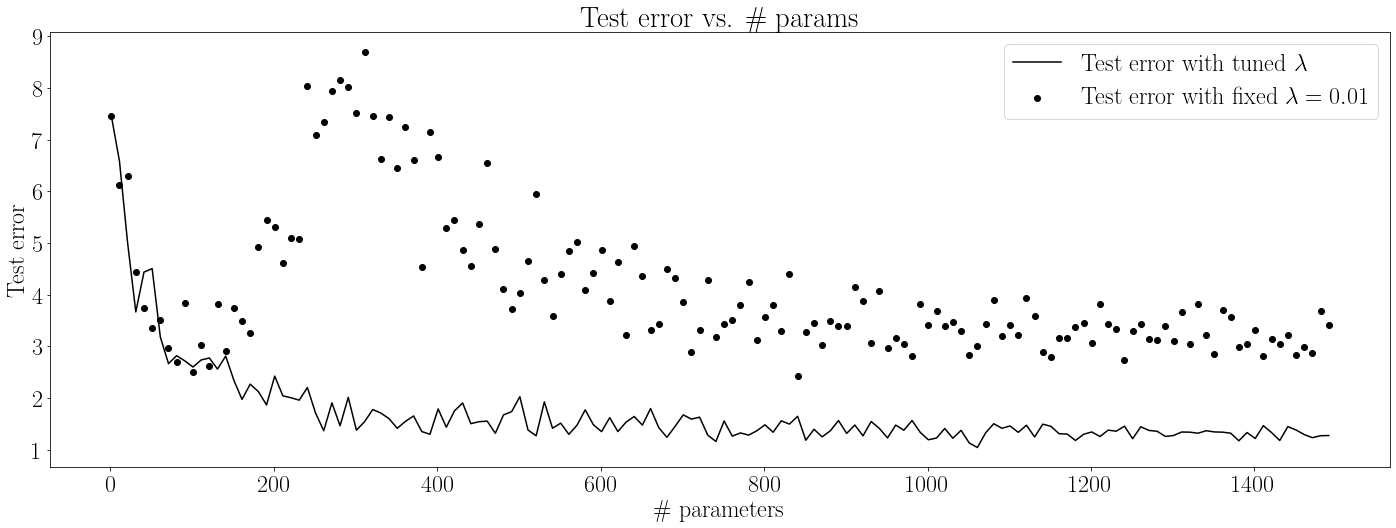

In [4]:
"""
Step 3 : Plot the results
"""    

plt.figure(figsize = (24, 8))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rc('font', size = 24)


plt.scatter(num_params, errors_fixed_lambda, color = 'black',
            label = r"Test error with fixed $\lambda = 0.01$",
            ) 
plt.legend()

plt.plot(num_params, errors_opt_lambda, 'k', label = r"Test error with tuned $\lambda$")
plt.legend()
plt.xlabel(r'$\#$ parameters')
plt.ylabel('Test error')
plt.title(r'Test error vs. $\#$ params')

# plt.savefig('double_descent.png')
plt.show()